June 16th, 2025

# Quasi-perpendicular QLT 

#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags
from QLT_equations.testoblique import dydt, get_omega_vec

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Quasi-perpendicular electrostatic waves

In [4]:
# parameters from 2021 paper 
# normalization (Vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e=c/omega_{pe}
omega_0 = 0.5 # Omega_ce
omega_pe = 4  # Omega_ce

n_c = 4/5 # n^e_0

# thermal velocity 
alpha_c_par = 0.0079  # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par  # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 1e-11
K_perp_0 = (alpha_c_perp**2 / 2) * n_c
K_par_0 = (alpha_c_par**2 / 2) * n_c
T_perp_0 = (alpha_c_perp**2 / 2) 
T_par_0 = (alpha_c_par**2 / 2) 
k_0 = 1 # d_e
dB0 = 4e-4 # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

# max time 
t_max = 600

In [5]:
k_ = np.linspace(170, 220, 50)
theta = 85

In [6]:
k_perp_ = k_ * np.sin(theta*np.pi/180)
k_par_ = k_ *np.cos(theta*np.pi/180)

In [7]:
k_abs = np.sqrt(k_perp_**2 + k_par_**2)
dk_perp = np.abs(k_perp_[1] - k_perp_[0])
dk_par = np.abs(k_par_[1] - k_par_[0])
dk = np.abs(k_[1] - k_[0])

In [8]:
sol_ = get_omega_vec(k_perp=k_perp_, k_par=k_par_, omega_pe=omega_pe, omega_pi=omega_pi, v_0=v_0,
                          alpha_i=alpha_i, alpha_c_perp=alpha_c_perp, alpha_c_par=alpha_c_par, n_c=n_c,
                          omega_0=omega_0, ic1=1.4 * 0.99 + 1e-2j, ic2=1.5 * 0.99 + 1e-3j, m_star=-3, maxiter=1000)

/Users/oissan/PycharmProjects/QLT_whistler/QLT_equations/general_plasma_equations.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(z)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)


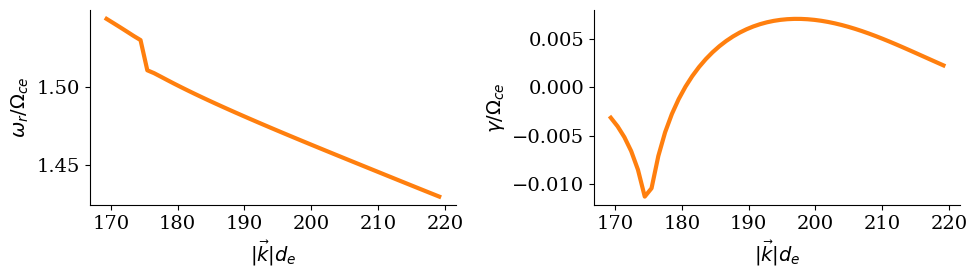

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
ax[0].plot(k_perp_, sol_.real, linewidth=3, color="tab:orange")
ax[0].set_ylabel('$\omega_r/\Omega_{ce}$')
ax[0].set_xlabel(r"$|\vec{k}|d_{e}$")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(k_perp_, sol_.imag, color="tab:orange", linewidth=3)
ax[1].set_ylabel('$\gamma/\Omega_{ce}$', rotation=90)
ax[1].set_xlabel(r"$|\vec{k}|d_{e}$")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

# QLT equations
\begin{align*}
    \frac{\mathrm{d} K_{\perp c}}{\mathrm{d} t} &= \frac{n_{c}}{2\pi}  \frac{\omega_{pe}^2}{\alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2} \mathrm{Im}\left\{\sum_{n=-\infty}^{\infty} n \exp(-\lambda_{c})  I_{n}(\lambda_{c}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c} } \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} - 1\right] \right] Z(\xi_{c}^{n})\right\}\\
    \frac{\mathrm{d} K_{\| c}}{\mathrm{d} t} &=\frac{n_{c}}{\pi}  \frac{\omega_{pe}^2}{\alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2}\mathrm{Im} \left\{\omega +  \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left\{\omega  + n \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} - 1\right]   \right] \xi_{c}^{n}Z(\xi_{c}^{n}) \right\}\\
    \frac{\mathrm{d} T_{\perp c}}{\mathrm{d} t} &= \frac{\omega_{pe}^2}{ 2\sqrt{\pi} \alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2}   \sum_{n=-\infty}^{\infty} n \exp(-\lambda_{c}) I_{n}(\lambda_{c})\left[\mathrm{Re}\{\xi_{c}^{0}\} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1 \right] \right] \exp\left(-\mathrm{Re}\{\xi_{c}^{n}\}^2 \right) \\
    \frac{\mathrm{d} T_{\| c}}{\mathrm{d} t} &= \frac{\omega_{pe}^2}{\sqrt{\pi} \alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2} \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left[ \mathrm{Re}\{\omega\} + n \left[\frac{\alpha_{\| c}^2 }{\alpha_{\perp c}^2 } -1\right] \right] \mathrm{Re}\{\xi_{c}^{n}\} \exp\left(-\mathrm{Re}\{\xi_{c}^{n}\}^2 \right) \\
    \partial_{t} \mathcal{E}_{E}(k_{\perp}, t)  &= 2 \mathrm{Im}\{\omega\}  \mathcal{E}_{E}(\vec{k}, t) \\
    \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t) &= \frac{4\pi}{\frac{\omega_{0}^2}{k_{\|0}^2 \omega_{pe}^2} + 1} \left[ -\frac{\mathrm{d} K_{\perp c}}{\mathrm{d} t} - \frac{1}{2}\frac{\mathrm{d} K_{\| c}}{\mathrm{d} t} - \frac{1}{\pi} \int_{0}^{\infty} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathrm{d} k_{\|}\mathrm{Im} \{ \omega\} \mathcal{E}_{E}(\vec{k}, t) \right]\\
    \frac{\mathrm{d} |V_{Dc}(t)|^2}{\mathrm{d} t} &= \frac{1}{4\pi} \left[\frac{\omega_{0}}{k_{\|0}}\frac{1}{\omega_{0} -1} \right]^2 \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t)\\
    |\vec{k}|^2 + 2 n_{c} \frac{\omega_{pe}^2}{\alpha_{\| c}^2} &\left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1\right]\right]\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{1}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega -\omega_{0}}{k \alpha_{i}}\right)\\
    \lambda_{c} &\coloneqq \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2} \\
    \xi_{c}^{n} &\coloneqq \frac{\omega - n}{k_{\|} \alpha_{\|c}}
\end{align*}


In [10]:
dE_init = E0 * np.ones(len(k_perp_))

ic1=1.4 * 0.99 + 1e-3j
ic2=1.5 * 0.99 - 1e-3j
m_star=-3

# simulate
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max],
                                   y0=np.concatenate(([K_perp_0], [K_par_0], [T_perp_0], [T_par_0], [dB0], [v_0**2], dE_init)),
                                   args=(k_perp_, k_par_, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0, m_star, ic1, ic2, "quasi_perp_gamma", False),
                                   atol=1e-8, rtol=1e-8, method='LSODA')

t =  0.0
max gamma =  0.0070502565991254935
t =  0.05999999999940092
max gamma =  0.0070502387358299685
t =  0.05999999999940092
max gamma =  0.00705023871279305
t =  0.11999999999880184
max gamma =  0.0070502208264544685
t =  0.11999999999880184
max gamma =  0.007050220803412243
t =  41.52113117836023
max gamma =  0.007032378554100971
t =  41.52113117836023
max gamma =  0.0070319516752831695
t =  41.52113117836023
max gamma =  0.007031496731183549
t =  82.92226235672166
max gamma =  0.007000133698369539
t =  82.92226235672166
max gamma =  0.0069982428616266554
t =  82.92226235672166
max gamma =  0.00699732999671291
t =  52.58930099889479
max gamma =  0.007024369076190675
t =  52.58930099889479
max gamma =  0.007024269367709959
t =  63.657470819429356
max gamma =  0.00701587353321873
t =  63.657470819429356
max gamma =  0.007015831733978459
t =  74.72564063996393
max gamma =  0.007006168815245309
t =  74.72564063996393
max gamma =  0.007006101224217169
t =  94.89831760661536
max gamma 

In [11]:
len(result.t)

25

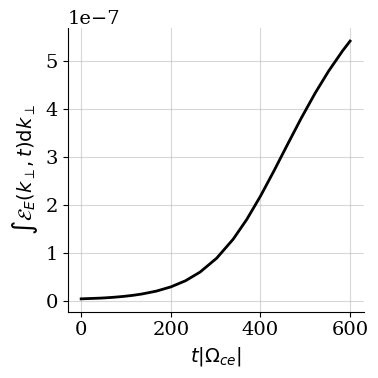

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(k_[:, None] * result.y[6:, :], axis=0)*dk/(8*np.pi)
ax.plot(result.t, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()

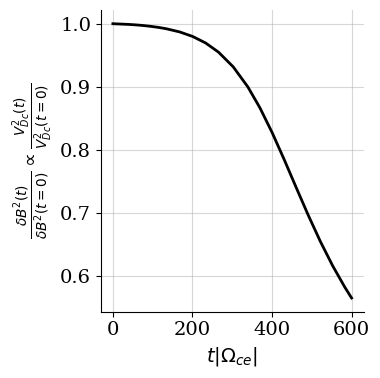

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[4, :]/result.y[4, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/oblique_magnetic_energy.png", dpi=300, bbox_inches='tight')

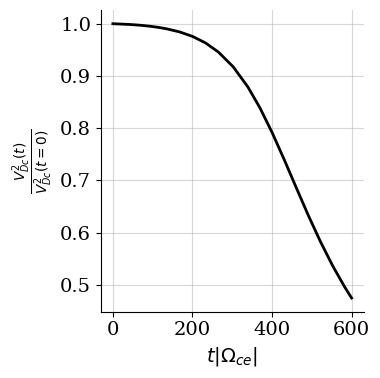

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[5, :]/result.y[5, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/oblique_magnetic_energy.png", dpi=300, bbox_inches='tight')

In [15]:
result.y[3, :]

array([3.12050000e-05, 3.12050008e-05, 3.12050017e-05, 3.12056960e-05,
       3.12059224e-05, 3.12061704e-05, 3.12064422e-05, 3.12070083e-05,
       3.12076804e-05, 3.12084806e-05, 3.12101057e-05, 3.12122808e-05,
       3.12151979e-05, 3.12191098e-05, 3.12251448e-05, 3.12334215e-05,
       3.12423617e-05, 3.12535438e-05, 3.12672054e-05, 3.12834722e-05,
       3.13023480e-05, 3.13237331e-05, 3.13474629e-05, 3.13733461e-05,
       3.13889952e-05])

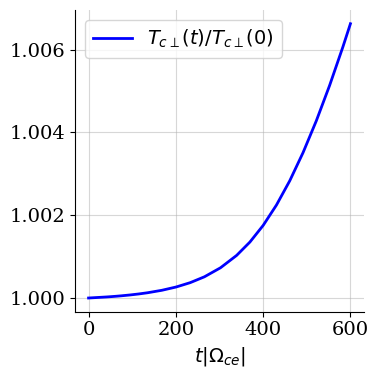

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
#ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="red", linewidth=2, label="$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="blue", linewidth=2, label="$T_{c\perp}(t)/T_{c\perp}(0)$")

ax.legend()
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/oblique_kinetic_energy_perp.png", dpi=300, bbox_inches='tight')

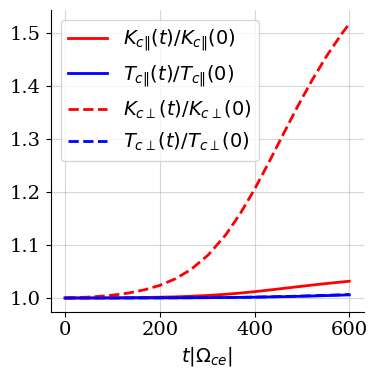

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="red", linewidth=2, label="$K_{c\|}(t)/K_{c\|}(0)$")
ax.plot(result.t, result.y[3, :]/result.y[3, 0], color="blue", linewidth=2, label="$T_{c\|}(t)/T_{c\|}(0)$")

ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="red", linewidth=2, ls="--", label="$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="blue", linewidth=2, ls="--", label="$T_{c\perp}(t)/T_{c\perp}(0)$")

ax.legend()
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/oblique_kinetic_energy_par.png", dpi=300, bbox_inches='tight')

In [36]:
# energy partition 
kinetic_energy = result.y[0, :] + 0.5 * result.y[1, :]
potential_energy = np.sum(k_perp_[:, None] * result.y[6:, :], axis=0)*dk / 8 / np.pi
magnetic_energy = result.y[4, :] /8 / np.pi * (  1 + (omega_0 / k_0 / (1 - omega_0))**2)
total_energy = kinetic_energy + magnetic_energy + potential_energy 

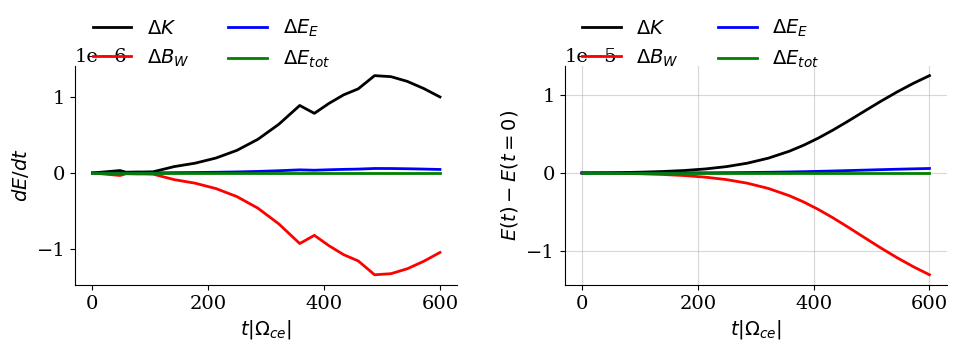

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

ax[0].plot(result.t[1:], kinetic_energy[1:] - kinetic_energy[:-1], color="black", linewidth=2, label="$\Delta K$")
ax[0].plot(result.t[1:], magnetic_energy[1:] - magnetic_energy[:-1], color="red", linewidth=2, label="$\Delta B_{W}$")
ax[0].plot(result.t[1:], potential_energy[1:] - potential_energy[:-1], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax[0].plot(result.t[1:], total_energy[1:] - total_energy[:-1], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax[0].set_xlabel(r'$t|\Omega_{ce}|$')
ax[0].set_ylabel(r'$dE/dt$')

legend = ax[0].legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax[1].plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W}$")
ax[1].plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax[1].plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax[1].set_xlabel(r'$t|\Omega_{ce}|$')
ax[1].set_ylabel(r'$E(t) - E(t=0)$')

legend = ax[1].legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


plt.grid(alpha=0.5) 
plt.tight_layout()
   